# Python and Jupyter Notebooks: A brief introduction

Pierre Collin-Dufresne and Philippe van der Beck

*Note: We have constructed this jupyter notebook to serve as a template for solving the different problem sets. Each subquestion includes a cell with code, which you are supposed to complete. Note, that many of the cells will not run independently without having executed all of the code above.
Feel free to reach out to philippe.vanderbeck@epfl.ch if you are stuck. Have fun! :-)*

## Simple Examples

In [1]:
1+1

2

In [2]:
print("Hello World")

Hello World


## Install libraries and use libraries

In [3]:
#conda install pandas=0.24.2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.sqrt(4)

2.0

In [10]:
manual_values = np.array([1,2,3,4,5,6,7,8,9,10])

In [11]:
simulated_values = np.random.randn(10)

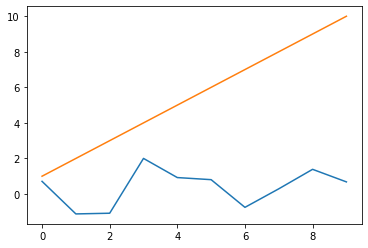

In [12]:
plt.plot(simulated_values)
plt.plot(manual_values)
plt.show()

## Simulate a simple return series
The return on a stock that does not pay any dividends is given by 

$r_t = \frac{S_{t}-S_{t-1} + D_t}{S_t}$

where $S_t$ is the share price at time $t$.
Let us first assume that returns are normally distributed with mean $\mu = 8\%$ and standard deviation $\sigma$ of 20\%.

$r_t \sim \mathcal{N}(\mu,\sigma)$

In [13]:
mu = 0.08
sigma = 0.2

In [8]:
r_t = np.random.normal(mu,sigma,100)
mu_hat = np.mean(r_t)
sigma_hat = np.std(r_t)
print(mu_hat,sigma_hat)

0.08548073058096296 0.1996636662248832


# Download Data From WRDS

You may first have to install the wrds connection

In [15]:
pip install wrds
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement psycopg2 (from versions: none)
ERROR: No matching distribution found for psycopg2
Note: you may need to restart the kernel to use updated packages.


now we can import wrds and login

In [20]:
import wrds
db=wrds.Connection(wrds_username='pvdb95')

Loading library list...
Done


now let's download some data! :-)
What would you like to download?

For example GameStop?

In [21]:
GME = db.raw_sql("select  date, permco, cusip, prc, ret,vol "
           "from crsp.dsf "
           "where cusip = '36467W10'"
           "and date>='2017-01-01'"
            "and date<='2022-12-31'")

In [22]:
print(GME.head(5))
print('This is a Pandas DataFrame!')

         date   permco     cusip        prc       ret        vol
0  2017-01-03  42775.0  36467W10  25.370001  0.004355  1941351.0
1  2017-01-04  42775.0  36467W10  25.920000  0.021679  2244345.0
2  2017-01-05  42775.0  36467W10  25.000000 -0.035494  3037717.0
3  2017-01-06  42775.0  36467W10  24.520000 -0.019200  2334362.0
4  2017-01-09  42775.0  36467W10  24.490000 -0.001224  1646678.0
This is a Pandas DataFrame!


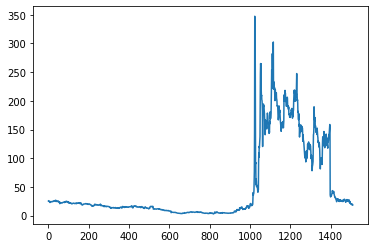

In [23]:
plt.plot(GME.prc)

In [24]:
# Pandas Syntax
print(GME.ret.mean(),GME.ret.std())

# Numpy Syntax
print(np.mean(GME.ret),np.std(GME.ret))

0.003830937572590319 0.08368024021643966
0.003830937572590319 0.08365252693857532


In [50]:
GME

,date,permco,cusip,prc,ret,vol
0,2017-01-03,42775.0,36467W10,25.370001,0.004355,1941351.0
1,2017-01-04,42775.0,36467W10,25.920000,0.021679,2244345.0
2,2017-01-05,42775.0,36467W10,25.000000,-0.035494,3037717.0
3,2017-01-06,42775.0,36467W10,24.520000,-0.019200,2334362.0
4,2017-01-09,42775.0,36467W10,24.490000,-0.001224,1646678.0
...,...,...,...,...,...,...
1505,2022-12-23,42775.0,36467W10,20.080000,0.013630,3174827.0
1506,2022-12-27,42775.0,36467W10,18.200001,-0.093625,4233045.0
1507,2022-12-28,42775.0,36467W10,17.920000,-0.015385,5671992.0
1508,2022-12-29,42775.0,36467W10,18.330000,0.022879,3442757.0


## Appendix: Simulate an SDE for the stock price and construct returns
Let's express the above in continuous time. The SDE for the share price is given by the geometric brownian motion (we assume that the stock does not pay any dividend)

$$\frac{dS_t}{S_t} = \mu dt + \sigma dz_t$$

In [55]:
# SDE Input Parameters
S=[]
n=365*10
dt=1.0/365.0
sdt=np.sqrt(dt)
mu=0.08
sig=0.2
mudt=mu*dt
sig2dt=sig*sig*dt
dz = np.random.randn(n)*sdt

# Solution to the SDE:
S=100*np.exp(np.cumsum( mudt-0.5*sig2dt+sig*dz ))

Plot the path of daily share prices

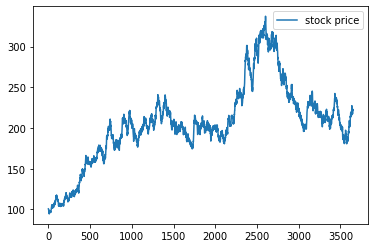

In [56]:
# 1. Plot Stock Price
plt.plot(S, label='stock price')
plt.legend()
plt.show()